In [90]:
#Load all required libraries
library(dplyr)
library(glmnet)
library(tidyr)
library(ggplot2)
library(caret)

Loading required package: lattice


In [102]:
data_normalized=read.csv(file="data_normalized_canada.csv",check.names=F,row.names=1)
head(data_normalized)

table(data_normalized$case)
dim(data_normalized)

,A2ML1,ABAT,ABCA13,ABCB4,ABHD2,ACTA2-AS1,ACTBP11,ACTBP2,ACTBP9,ACTG1P1,⋯,WNT4,YTHDF3,ZCCHC18,ZFAND3,ZNF322,ZNF540,ZNF706,ZNF729,ZNF831,case
50154,-0.6642494,-0.6620015,-0.667,-0.6476598,0.6197017,-0.6522483,0.4279183,-0.001846084,-0.63577453,0.4260663,⋯,-0.7819006,-0.48871028,-0.6056096,0.5834138,0.3690969,-1.28852060,0.27268743,0.6824413,-0.64475714,Case
50170,-0.8980825,-0.9312119,-0.876,-0.9250207,0.8370252,-0.8519532,0.7381293,0.251189225,0.75756455,0.6894773,⋯,-0.9470633,-0.04600777,-0.8073451,0.2989182,0.2785766,0.97438483,-0.11953115,0.3158582,0.09289343,Case
50344,1.1603015,1.4385895,0.966,1.5165289,-0.8078695,0.9060069,0.6049920,0.658501444,1.41331643,0.6125274,⋯,0.5068296,0.37275828,0.9684893,-3.4870347,-1.7593007,-0.08816959,-6.26253675,-1.4309995,0.71951149,Case
50485,0.1473460,-1.0278308,0.414,-0.3458144,-0.7258085,3.5050875,0.6347539,0.658501444,-0.15636687,0.3764517,⋯,-0.2086486,0.03654794,0.8570816,-0.1287254,1.0689352,0.17811745,0.08629959,1.2341827,2.62465527,Case
50563,-0.5473088,-0.5273688,2.820,-0.5089508,-1.6288960,-0.5523753,0.6318675,0.176804469,0.07947867,0.3037570,⋯,-0.6993022,-0.48871028,-0.5047212,0.2790814,1.0661979,0.54409148,0.05834621,0.9499635,-0.55731732,Case
50590,-0.5270865,-0.5040871,-0.544,-0.4849642,0.9845909,-0.5351045,0.5447889,0.138928229,0.07947867,0.6259058,⋯,-0.6850187,-0.42200033,-0.4872748,0.5313279,0.5006391,-1.19828275,-0.14240364,0.8722686,-0.54219658,Case



   Case Control 
    126      59 

[1] 185 483

In [92]:
data_normalized=read.csv(file="20180206_ERPosNeg_Nanostring_normalized.csv",check.names=F,row.names=1)
head(data_normalized)
table(data_normalized$Group)
table(data_normalized$case)
dim(data_normalized)

,A2ML1,ABAT,ABCA13,ABCB4,ABHD2,ACTA2-AS1,ACTBP11,ACTBP2,ACTBP9,ACTC1,⋯,ZNF540,ZNF706,ZNF729,ZNF831,age,yearbbd,follow_years,impress,Group,case
50154,0.000000,0,0.000000,0,4.523562,0.000000,5.727920,8.317413,9.539159,0,⋯,0.000000,6.584963,6.000000,0.000000,50,1975,11.68,NP,ER+,Case
50170,0.000000,0,0.000000,0,4.954196,0.000000,6.169925,8.405141,9.623881,0,⋯,3.584963,5.954196,5.087463,1.000000,63,1970,12.31,PDWA,ER-,Case
50344,0.000000,0,0.000000,0,0.000000,0.000000,3.807355,10.818582,12.574830,0,⋯,0.000000,0.000000,0.000000,0.000000,49,1983,25.39,NP,cont,Case
50485,3.807355,0,4.169925,1,4.700440,6.066089,7.000000,9.428360,9.447083,0,⋯,4.906891,7.189825,8.348728,5.754888,50,1969,18.24,NP,cont,Case
50563,0.000000,0,5.459432,0,0.000000,0.000000,8.066089,10.423116,11.224605,0,⋯,3.169925,8.312883,8.614710,0.000000,65,1968,12.69,NP,ER-,Case
50590,0.000000,0,0.000000,0,5.807355,0.000000,6.392317,8.988685,10.121534,0,⋯,0.000000,6.629357,7.000000,0.000000,60,1974,18.57,PDWA,cont,Case



cont  ER-  ER+ 
  64   62   59 


   Case Control 
    126      59 

[1] 185 504

In [3]:
#reomve genes which are zeros along all subjects (504-488=16 genes)
data_normalized=data_normalized[, colSums(data_normalized != 0) > 0]
dim(data_normalized)

[1] 185 488

In [103]:
#remove age, yearbbd, follow_years, impress, group
data=data_normalized %>%  select(-c(age,yearbbd,follow_years,impress,Group))
head(data)
dim(data)

ERROR: Error in FUN(X[[i]], ...): object 'age' not found


In [104]:
#Canada
data=data_normalized

In [95]:
x = nearZeroVar(data, saveMetrics = TRUE)
head(x[x[,"zeroVar"] > 0, ])
dim(x[x[,"zeroVar"] > 0, ])
head(x[x[,"zeroVar"] + x[,"nzv"] > 0, ])
dim(x[x[,"zeroVar"] + x[,"nzv"] > 0, ])
dim(x)

,freqRatio,percentUnique,zeroVar,nzv
ACTC1,0,0.5405405,TRUE,TRUE
ADRA2B,0,0.5405405,TRUE,TRUE
C16orf52,0,0.5405405,TRUE,TRUE
CACNA1B,0,0.5405405,TRUE,TRUE
CYP3A5,0,0.5405405,TRUE,TRUE
DDX3Y,0,0.5405405,TRUE,TRUE


[1] 16  4

,freqRatio,percentUnique,zeroVar,nzv
A2ML1,84.5,8.1081081,FALSE,TRUE
ABAT,176.0,5.4054054,FALSE,TRUE
ABCA13,84.0,9.1891892,FALSE,TRUE
ABCB4,178.0,4.3243243,FALSE,TRUE
ACTA2-AS1,173.0,7.0270270,FALSE,TRUE
ACTC1,0.0,0.5405405,TRUE,TRUE


[1] 126   4

[1] 499   4

# Find Aalpha

In [97]:
table(data[,ncol(data)])


   Case Control 
    126      59 

In [105]:
# selected genes with glmnet R packages 
#Find the best alpha
bestalpha=findalpha(data)
bestalpha

ERROR: Error in findalpha(data): could not find function "findalpha"


In [109]:
#' A Find the best alpha Function
#'
#' This function find the best alpha which give the least square root error
#'http://ellisp.github.io/blog/2016/08/13/fitbit-lasso
#' @param data The matrix you want to find the alpha
#' @keywords alpha
#' @export
#' @examples bestalpha=findalpha(data)
#' findalpha()
#'
#'

findalpha  <- function(data)  {
set.seed(123)
alphas <- seq(from = 0, to  = 1, length.out = 10)
numberOFrepeats=100
res <- matrix(0, nrow = length(alphas), ncol = numberOFrepeats) # five columns for results - five repeats of each CV run
x=data.matrix(data[,1:(ncol(data)-1)])
y=as.factor(data[,ncol(data)])
for(i in 1:length(alphas)){
   for(j in 2:numberOFrepeats){
      cvmod <- cv.glmnet(x, y , alpha = alphas[i],family='binomial',nfolds=10, 
                   standardize=TRUE, type.measure='class')
      res[i, c(1, j)] <- c(alphas[i], sqrt(min(cvmod$cvm)))
   }
}
res <- data.frame(res)
res$average_rmse <- apply(res[ , 2:numberOFrepeats], 1, mean)
res <- res[order(res$average_rmse), ]
names(res)[1] <- "alpha"

res1 <- res %>%
   select(-average_rmse) %>%
   gather(trial, rmse, -alpha)
    
  p= res1 %>% ggplot(aes(x = alpha, y = rmse)) +
   geom_point() +
   geom_smooth(se = FALSE) +
   geom_vline(xintercept=res[1, 1],color='red')+
   labs(y = "Root mean square error") +
   ggtitle("Cross validation best RMSE for differing values of alpha")

   plot(p)
# best alpha varies according to the random seed set earlier but with seed 123 it is 0.22
  bestalpha <- res[1, 1]
    return(bestalpha)

}

# Find lambda 

In [86]:
#Find the best lampda
result=findlamda(data,bestalpha)


In [87]:
result$genes_list

[[1]]
[1] "PARP3"    "C6orf106" "TCEA3"   

[[2]]
[1] "PARP3" "TCEA3"

[[3]]
[1] "PARP3" "TCEA3"

[[4]]
[1] "PARP3"    "C6orf106" "TCEA3"   

[[5]]
[1] "PARP3"

[[6]]
[1] "PARP3"

[[7]]
[1] "PARP3"

[[8]]
[1] "PARP3" "TCEA3"

[[9]]
[1] "PARP3"    "C6orf106" "TCEA3"   

[[10]]
[1] "PARP3"    "C6orf106" "TCEA3"

In [88]:
result$consensus_genes

[1] "PARP3"

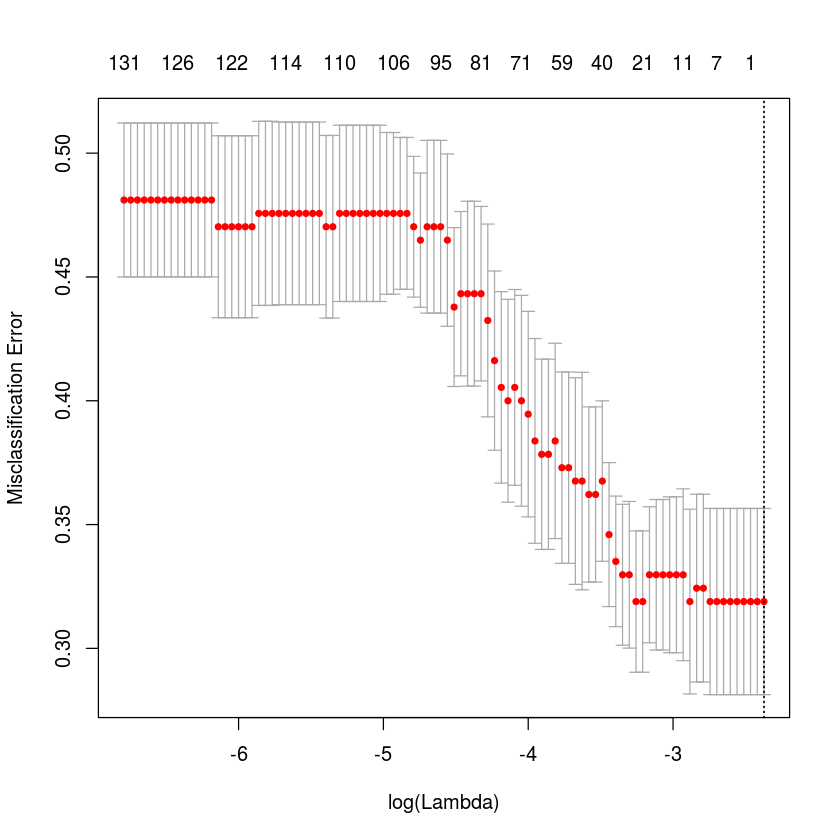

In [62]:
plot(result$model)

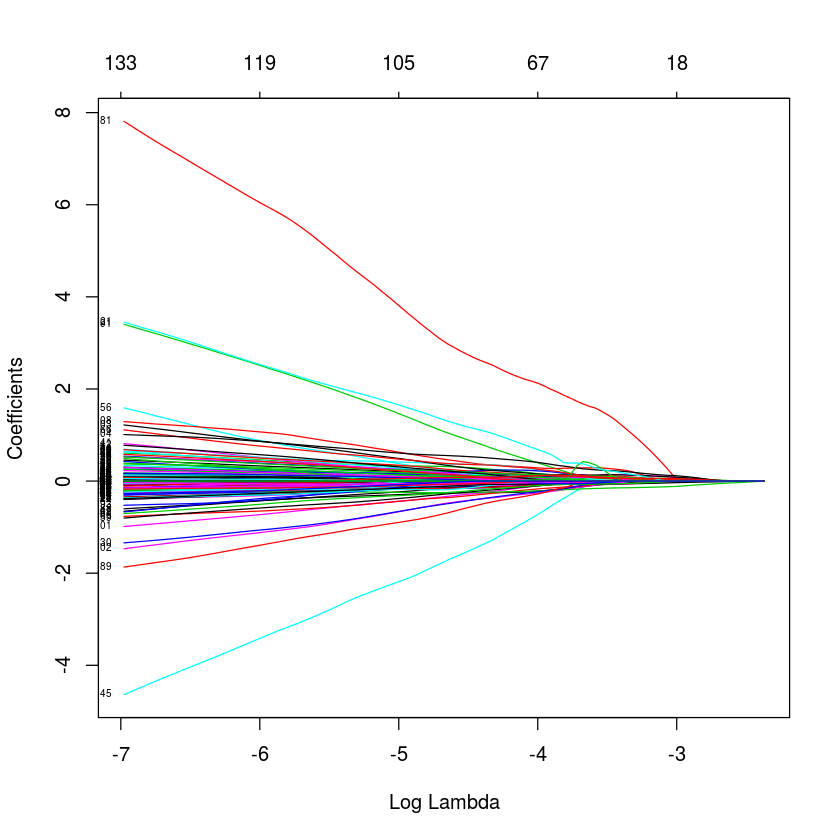

In [65]:
#https://web.stanford.edu/~hastie/glmnet/glmnet_alpha.html
plot(result$model$glmnet.fit, xvar="lambda", label=TRUE)

In [85]:
#' A Find the best lamda Function
#'
#' This function find the best lamda based on the best alpha
#'https://stats.stackexchange.com/questions/97777/variablity-in-cv-glmnet-results
#' @param data The matrix you want to find the best lampda and alpha you find from findalpha function
#' @keywords lamda
#' @export
#' @examples bestlamda=findalpha(data,bestalpha)
#' findlamda()
#'
#'

findlamda  <- function(data,bestalpha)  {
    
res = list()
    
lambdas = NULL
genes_list=list()
    

x=data.matrix(data[,1:(ncol(data)-1)])
y=as.factor(data[,ncol(data)])   
    
for (j in 1:10)
{
for (i in 1:100)
{
  #fit <- cv.glmnet(x, y, family='binomial',nfolds=10, 
       #            standardize=TRUE, type.measure='class')
    
    #cv.glmnet does NOT search for values for alpha. A specific value should be supplied, else alpha=1 is assumed by default.
    
    fit <- cv.glmnet(x, y, family='binomial',nfolds=10, 
                   standardize=TRUE, type.measure='class',alpha=1)
    
  errors = data.frame(fit$lambda,fit$cvm)
  lambdas <- rbind(lambdas,errors)
}
# take mean cvm for each lambda
lambdas <- aggregate(lambdas[, 2], list(lambdas$fit.lambda), mean)

# select the best one
bestindex = which(lambdas[2]==min(lambdas[2]))
bestlambda = lambdas[bestindex,1]
    
res$bestlambda=bestlambda
res$model=fit    
lambdas = NULL
cv.lasso<- glmnet(x, y,lambda=bestlambda,family='binomial',standardize=TRUE)

zz=as.matrix(coef(cv.lasso, s=bestlambda)[,1])

zz1=as.matrix(zz[order(abs(zz[,1]),decreasing = T),])

zz2=data.frame(zz1[zz1!=0 & rownames(zz1)!="(Intercept)",1])
colnames(zz2)="coffiecents"

genes_list[[j]]=rownames(zz2)
}
    

    
genes_list_consensus=Reduce(intersect,genes_list) 
genes_list_consensus=make.names(genes_list_consensus, unique=TRUE)
    
res$consensus_genes=genes_list_consensus
res$genes_list=genes_list   
    
return(res)
    
    }

In [99]:
?t.test

In [91]:
?rfe